In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt

from copy import copy
from pprint import pprint

import sys
import os
#from sklearn import datasets

# Practica I - Data Exploration

## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
#Section
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())
case_data_Boston = case_data_Boston_norm * 100

### 1.3 Data Exploration

In [46]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(10,10),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False,
                            line_style='r',
                            constant_values=[], 
                            verbose=False):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_values = dataFrame_dummy.iloc[:, column_id]
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(temp_values, temp_style)
        else:
            temp_obj.plot(temp_values, plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    line_x = [dataFrame_dummy.index.values.min(), dataFrame_dummy.index.values.max()]
                    line_y = [temp_constant, temp_constant]
                    
                    temp_obj.plot(line_x, line_y, line_style)
            except:
                line_x = [dataFrame_dummy.index.values.min(), dataFrame_dummy.index.values.max()]
                line_y = [constant_values[column_id], constant_values[column_id]]

                temp_obj.plot(line_x, line_y, line_style)
            else:
                pass
            
        
        if verbose:
            temp_shape = dataFrame_dummy.iloc[:, column_id].shape 
            print("Column ID {:d} elements : [{:f}]".format(column_id, temp_shape[0]))
    
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

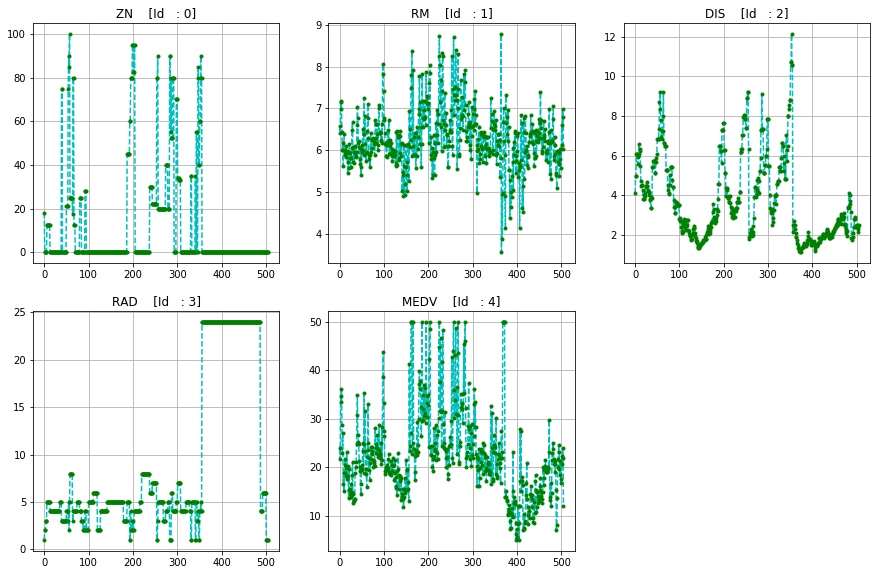

In [47]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [48]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

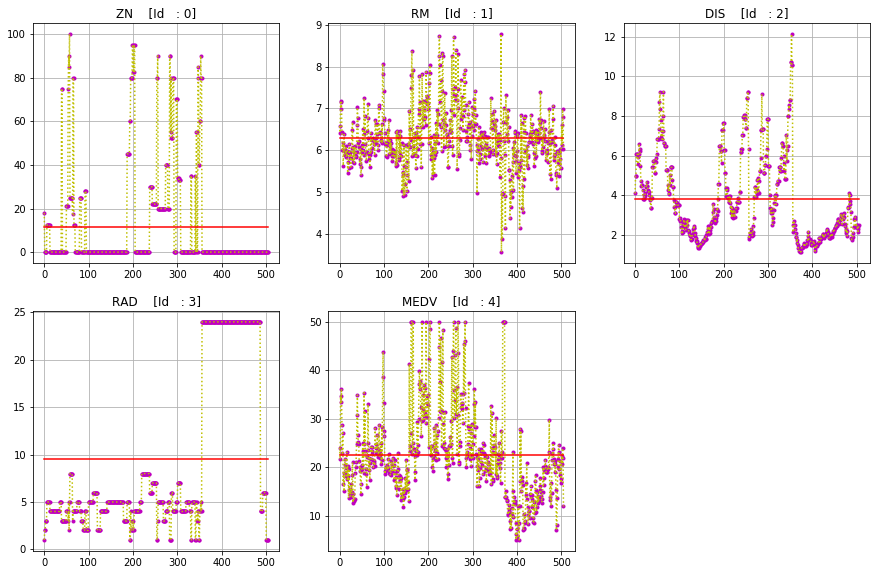

In [49]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [50]:
median_Boston = case_data_Boston.median()
print(median_Boston)

ZN       0.00000
RM       6.20850
DIS      3.20745
RAD      5.00000
MEDV    21.20000
dtype: float64


##### PLOT

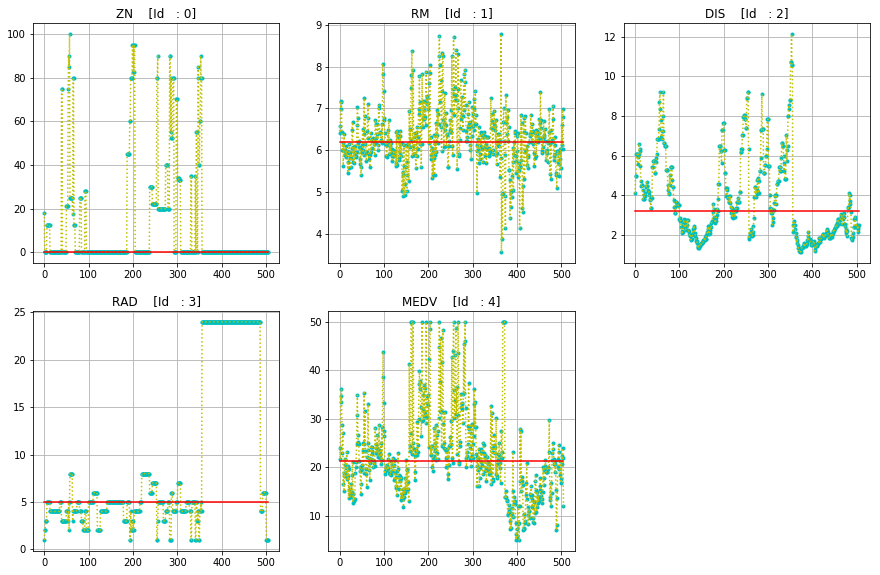

In [51]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [52]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

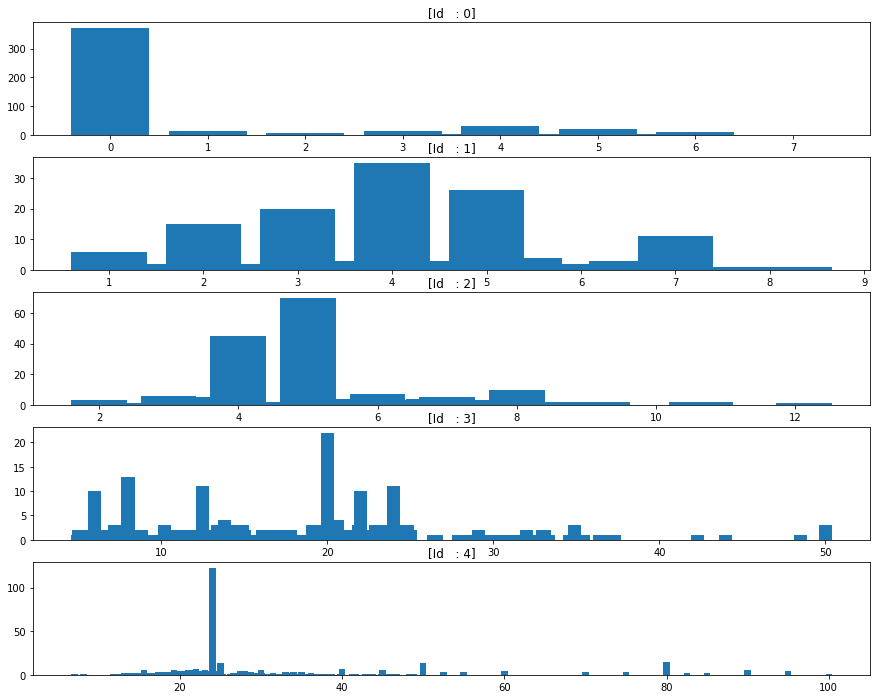

In [53]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [54]:
quantile_n = 200
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

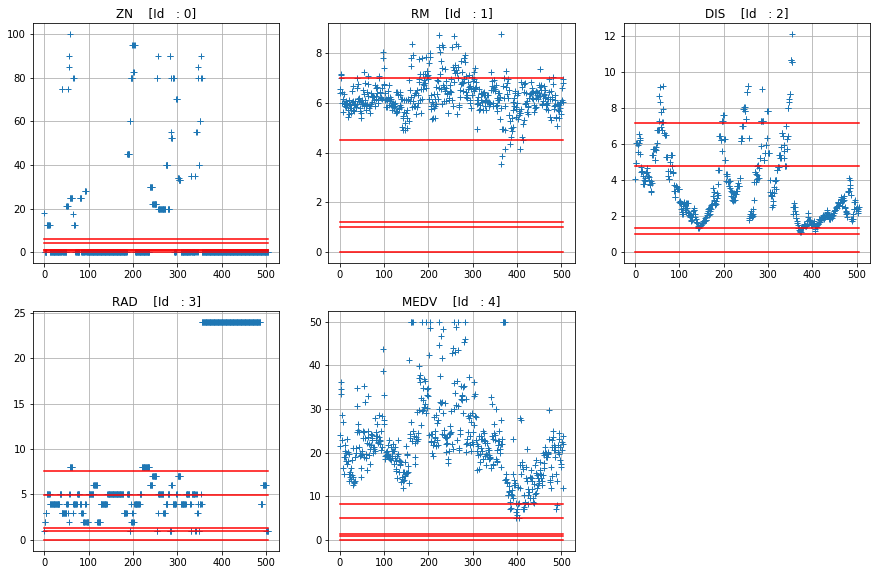

In [55]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [56]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

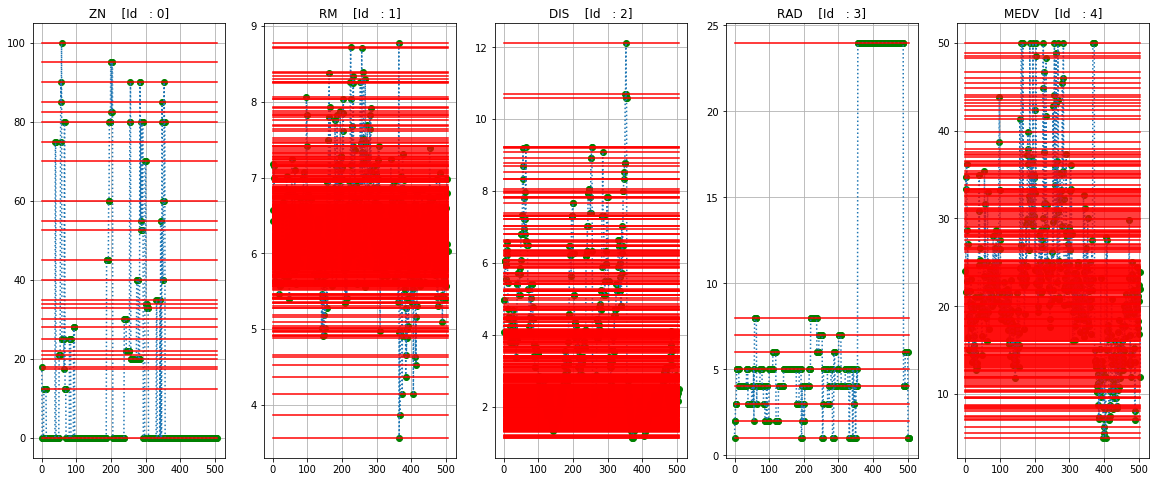

In [57]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,8),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [58]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

,ZN,RM,DIS,RAD,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,6.284634,3.795043,9.549407,22.532806
std,23.322453,0.702617,2.105710,8.707259,9.197104
min,0.000000,3.561000,1.129600,1.000000,5.000000
25%,0.000000,5.885500,2.100175,4.000000,17.025000
50%,0.000000,6.208500,3.207450,5.000000,21.200000
75%,12.500000,6.623500,5.188425,24.000000,25.000000
max,100.000000,8.780000,12.126500,24.000000,50.000000


### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?
Looking at the [Plot 3] in 1.3.5 Section (Unique Descriptor), if we limit the plot range were the lower "distance" values are, the relation (in his strong definition) can be assumed as true.

Strong Hypotesis : + Near to , + People
Weak Hypotesis : - Near To, - People

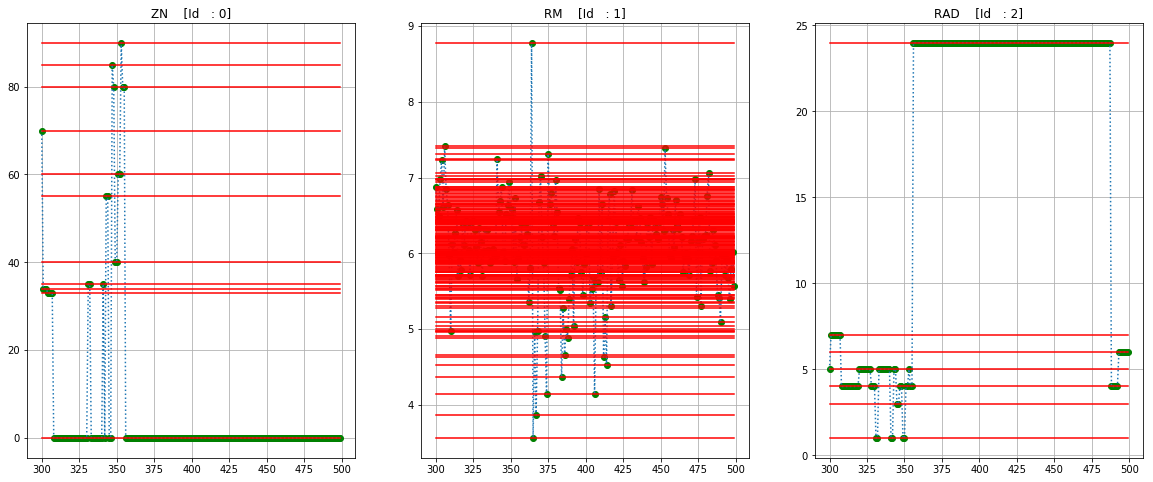

In [59]:
a_hypotesis_df = case_data_Boston.iloc[300:500, [0, 1, 3]].copy()

a_hypotesis_container = []
for id_columns in range(a_hypotesis_df.shape[1]):
    a_hypotesis_temp = np.unique(a_hypotesis_df.dropna().iloc[:, id_columns])
    a_hypotesis_container.append(a_hypotesis_temp)

dummy_DataFrame_plotter(a_hypotesis_df,
                        grid_subplot=[1,3],
                        plot_size=(20,8),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=a_hypotesis_container
                       ).show()

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?


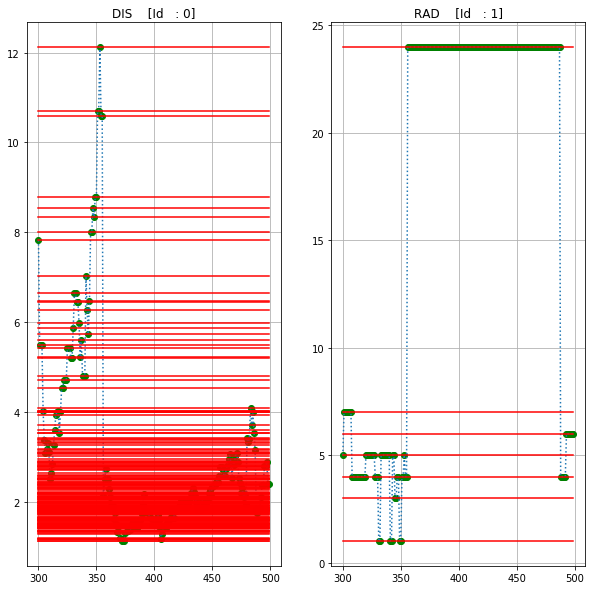

In [60]:
b_hypotesis_df = case_data_Boston.iloc[300:500, [2, 3]].copy()

b_hypotesis_container = []
for id_columns in range(b_hypotesis_df.shape[1]):
    b_hypotesis_temp = np.unique(b_hypotesis_df.dropna().iloc[:, id_columns])
    b_hypotesis_container.append(b_hypotesis_temp)

dummy_DataFrame_plotter(b_hypotesis_df,
                        grid_subplot=[1,2],
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=b_hypotesis_container
                       ).show()

#### 1.4.3 rent increased the more nearly you are?

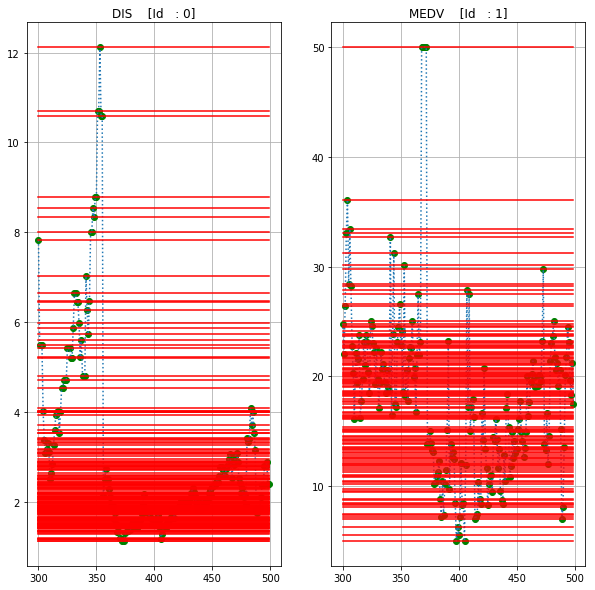

In [62]:
c_hypotesis_df = case_data_Boston.iloc[300:500, [2, 4]].copy()

c_hypotesis_container = []
for id_columns in range(c_hypotesis_df.shape[1]):
    c_hypotesis_temp = np.unique(c_hypotesis_df.dropna().iloc[:, id_columns])
    c_hypotesis_container.append(c_hypotesis_temp)

dummy_DataFrame_plotter(c_hypotesis_df,
                        grid_subplot=[1,2],
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=c_hypotesis_container
                       ).show()

_ _ _

___


_ _ _

## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [21]:
try :
    ieducations_dataset = pd.read_csv("./microdados_censo_superior_2014/2014/DADOS/DM_IES.CSV", sep='|', encoding='latin1')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels

In [22]:
ieducationals_descriptions = pd.read_excel("./microdados_censo_superior_2014/2014/ANEXOS/ANEXO I/ANEXO I - 2014.xlsx", encoding='latin1')
ieducationals_descriptions.columns = ieducationals_descriptions.iloc[0,:]
ieducationals_descriptions = ieducationals_descriptions.reindex(ieducationals_descriptions.index.drop(0))
ieducationals_descriptions

,N,Nome da Variável,Descrição da Variável,Tipo,Tam.(1),Categorias
1,DADOS DA IES,NaN,NaN,NaN,NaN,NaN
2,1,CO_IES,Código único de identificação da IES,Num,8,NaN
3,2,NO_IES,Nome da IES,Char,200,NaN
4,3,SGL_IES,Sigla da IES,Char,20,NaN
5,4,CO_MANTENEDORA,Código único de identificação da mantenedora,Num,8,NaN
6,5,NO_MANTENEDORA,Nome da mantenedora,Char,200,NaN
7,6,CO_CATEGORIA_ADMINISTRATIVA,Código da Categoria Administrativa,Num,8,1. Pública Federal
8,NaN,NaN,NaN,NaN,NaN,2. Pública Estadual
9,NaN,NaN,NaN,NaN,NaN,3. Pública Municipal
10,NaN,NaN,NaN,NaN,NaN,4. Privada com fins lucrativos


#### 1.1.3.- Viewing Data

In [23]:
ieducations_dataset

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,5103403,...,6.107981e+06,6.883301e+08,0.000000e+00,2.167293e+08,1.025640e+08,6.851267e+07,1.151219e+08,2.607502e+07,1.414911e+07,1.512860e+08
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,2,FUNDACAO UNIVERSIDADE DE BRASILIA,1,Pública Federal,1,Universidade,5300108,...,3.797304e+08,1.829353e+09,1.252311e+07,5.778626e+08,3.852417e+08,1.967817e+08,4.169409e+08,4.546595e+07,5.167955e+07,1.938561e+08
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,3,FUNDACAO UNIVERSIDADE FEDERAL DE SERGIPE,1,Pública Federal,1,Universidade,2806701,...,4.734826e+06,5.477277e+08,1.019510e+06,1.969657e+08,1.035931e+08,6.279120e+07,8.415200e+07,6.724216e+07,1.659664e+06,1.831174e+06
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,4,FUNDACAO UNIVERSIDADE DO AMAZONAS,1,Pública Federal,1,Universidade,1302603,...,1.587663e+07,5.148909e+07,6.398281e+08,2.866003e+08,1.000000e+00,1.675805e+08,1.433790e+08,1.702855e+07,0.000000e+00,0.000000e+00
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,6,UNIVERSIDADE FEDERAL DE OURO PRETO,1,Pública Federal,1,Universidade,3146107,...,3.257012e+06,4.683098e+08,0.000000e+00,1.113960e+08,5.307383e+07,3.090087e+07,1.396111e+08,2.174077e+07,1.003245e+08,1.451963e+07
5,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,10,ASSOCIACAO PARANAENSE DE CULTURA - APC,5,Privada sem fins lucrativos,1,Universidade,4106902,...,5.437155e+08,0.000000e+00,3.887692e+06,1.562172e+08,3.664354e+07,9.701035e+07,1.189383e+08,1.284999e+08,1.029394e+07,0.000000e+00
6,11,UNIVERSIDADE CATÓLICA DE PERNAMBUCO,UNICAP,11,CENTRO DE EDUCACAO TECNICA E CULTURAL,5,Privada sem fins lucrativos,1,Universidade,2611606,...,1.024540e+08,0.000000e+00,2.741000e+07,5.053600e+07,2.517400e+07,2.687200e+07,2.563100e+07,6.490000e+06,1.601000e+06,0.000000e+00
7,13,UNIVERSIDADE DE CAXIAS DO SUL,UCS,13,FUNDACAO UNIVERSIDADE DE CAXIAS DO SUL,5,Privada sem fins lucrativos,1,Universidade,4305108,...,2.983741e+08,0.000000e+00,3.181568e+07,1.028217e+08,3.612653e+07,4.086896e+07,1.255010e+08,1.288206e+07,1.271124e+07,0.000000e+00
8,14,UNIVERSIDADE DO VALE DO RIO DOS SINOS,UNISINOS,14,ASSOCIACAO ANTONIO VIEIRA,5,Privada sem fins lucrativos,1,Universidade,4318705,...,3.644402e+08,2.504891e+06,4.427506e+07,1.084166e+08,3.009466e+07,4.142498e+07,8.328550e+07,1.675731e+07,5.404898e+06,1.016494e+07
9,15,UNIVERSIDADE CATÓLICA DE PETRÓPOLIS,UCP,15,MITRA DIOCESANA DE PETROPOLIS,5,Privada sem fins lucrativos,1,Universidade,3303906,...,3.438473e+07,0.000000e+00,2.630561e+06,1.582187e+07,6.720275e+06,2.596313e+06,4.783868e+06,4.364268e+04,3.413382e+04,4.146495e+06


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [24]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns

Index(['ZN', 'RM', 'DIS', 'RAD', 'MEDV'], dtype='object')

### 1.3 Data Exploration

In [25]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(15,15),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False, 
                            constant_values=[]):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(dataFrame_dummy.iloc[:, column_id], temp_style)
        else:
            temp_obj.plot(dataFrame_dummy.iloc[:, column_id], plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    temp_obj.plot(temp_constant * np.ones((dataFrame_dummy.shape[0])), 'r')
            except:
                temp_obj.plot(constant_values[column_id] * np.ones((dataFrame_dummy.shape[0])), 'r')
            else:
                pass
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

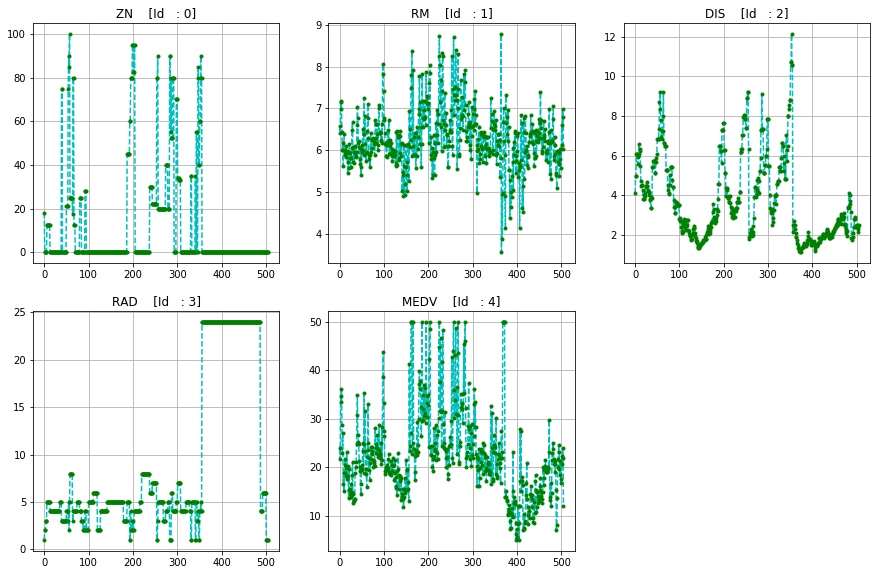

In [26]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [27]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

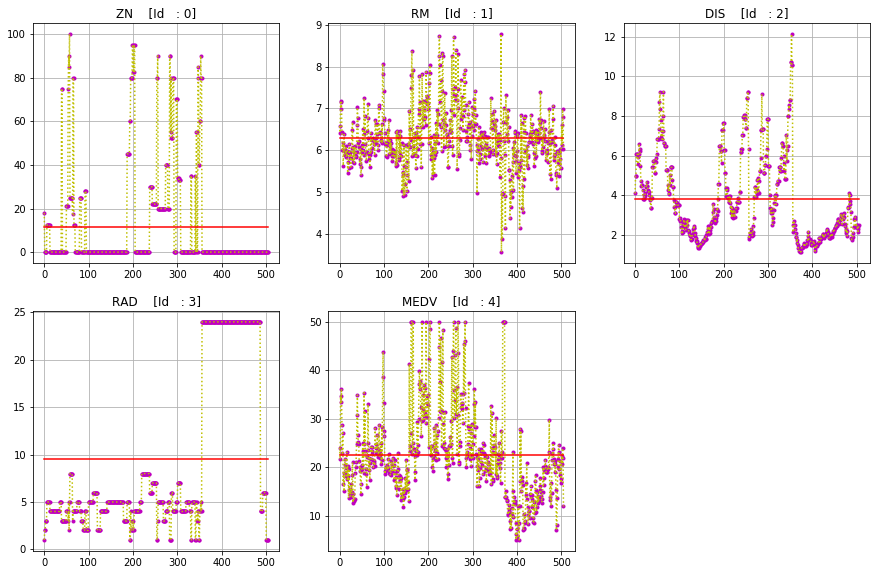

In [28]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [29]:
median_Boston = case_data_Boston.median()
print(median_Boston)

ZN       0.00000
RM       6.20850
DIS      3.20745
RAD      5.00000
MEDV    21.20000
dtype: float64


##### PLOT

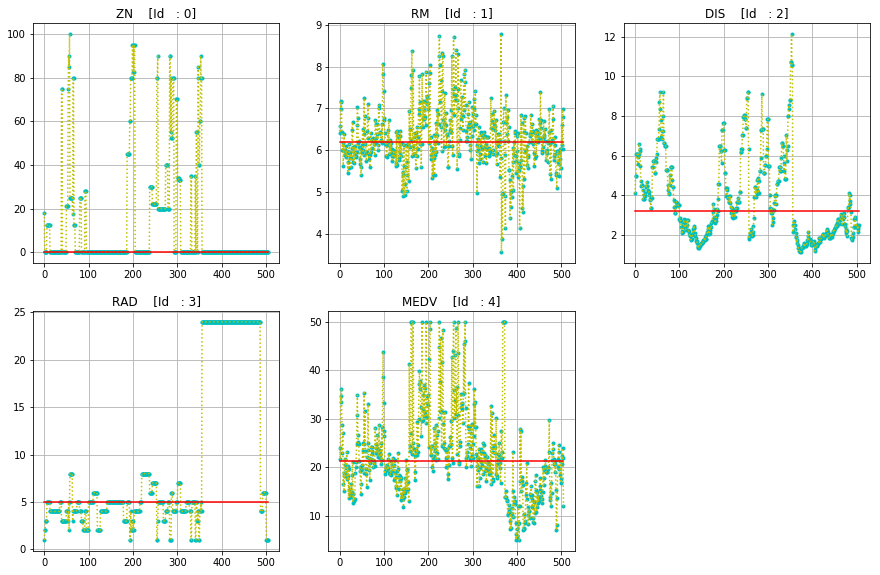

In [30]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [31]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

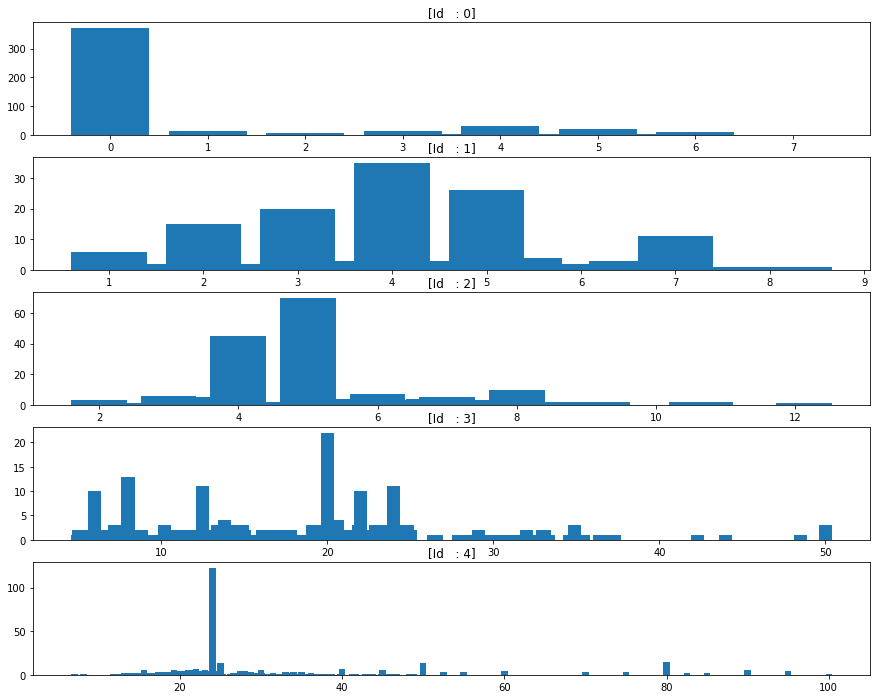

In [32]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [33]:
quantile_n = 5
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

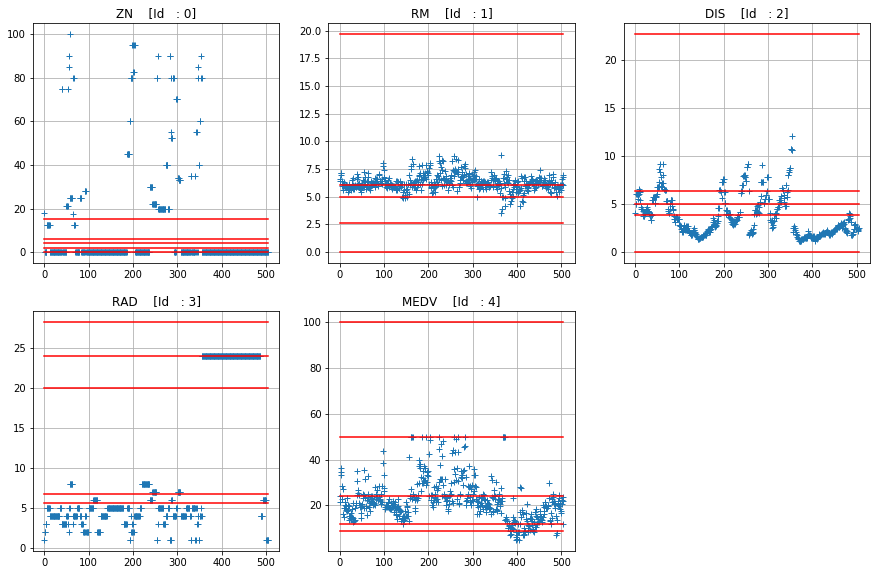

In [34]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [35]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

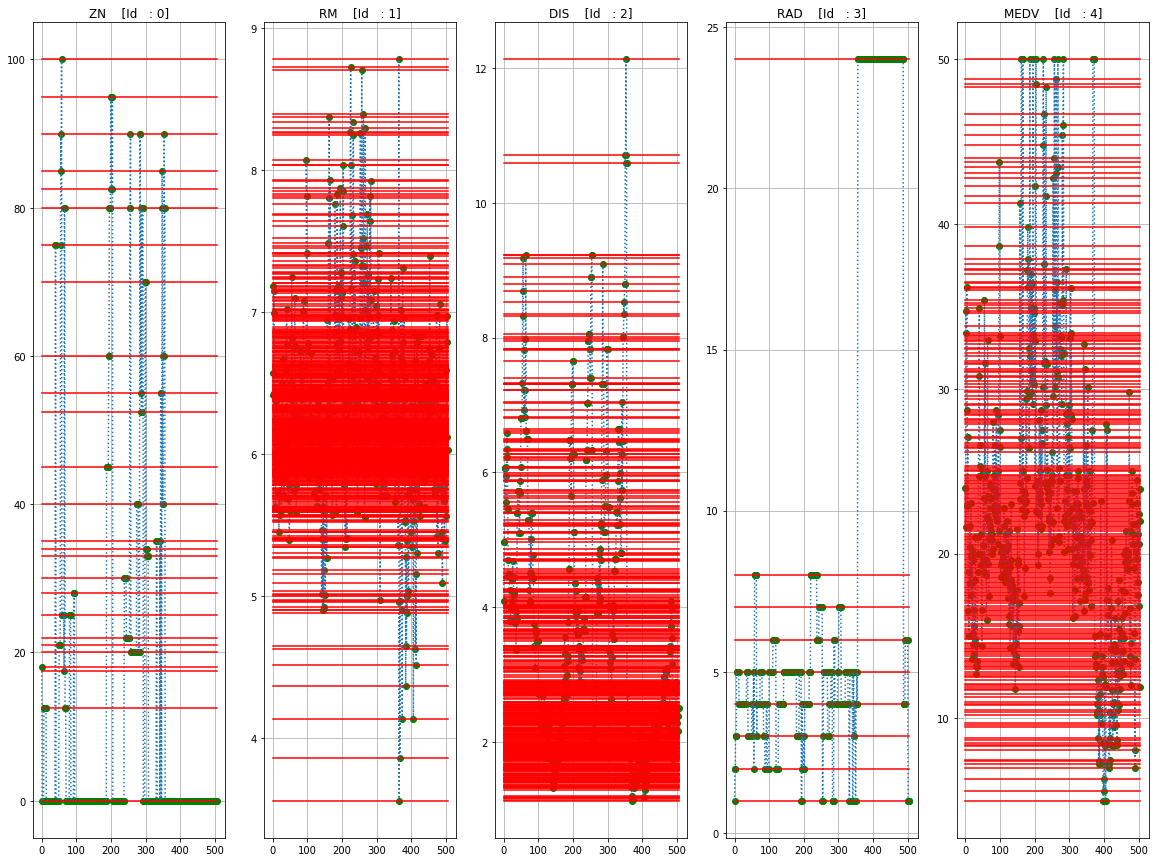

In [36]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,15),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [37]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

,ZN,RM,DIS,RAD,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,6.284634,3.795043,9.549407,22.532806
std,23.322453,0.702617,2.105710,8.707259,9.197104
min,0.000000,3.561000,1.129600,1.000000,5.000000
25%,0.000000,5.885500,2.100175,4.000000,17.025000
50%,0.000000,6.208500,3.207450,5.000000,21.200000
75%,12.500000,6.623500,5.188425,24.000000,25.000000
max,100.000000,8.780000,12.126500,24.000000,50.000000


### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 The more close residential center are from Indutrial Center, the more dense are ?

#### 1.4.2 [1.4.1] The more close, the more accesible is?

#### 1.4.3 The rent increase the more nearly you are?